# <span style="color:orange"> Problems.<span>
*By Laura Lyons (G00438882)*
***

## <span style="color:orange"> Table of Contents <a id="table-of-contents"></a>
***
1. [Introduction](#introduction)
2. [Assigned Problems](#assigned-problems)  
   2.1. [Problem 01 – Extending the Lady Tasting Tea](#problem-01--extending-the-lady-tasting-tea)  
   2.2. [Problem 02 – Normal Distribution](#problem-02--normal-distribution)  
   2.3. [Problem 03 – t-Tests](#problem-03--t-tests)  
   2.4. [Problem 04 – ANOVA](#problem-04--anova)

## <span style="color:orange"> 1. Introduction <span> <a id="introduction"></a>

This notebook was created to fulfill an assessment requirement of Applied Statistics 25-25:(8651), Higher Diploma in Science, Data Analytics, as part of the H.Dip in Science in Data Analytics.

Each week, following a series of lectures, a problem was set to demonstrate both learning and additional reading/research on the topics discussed in the lectures.

This notebook is a collection of the solutions to the problems set, including some additional guidance and instruction on how to run each assignment/program.

***

## <span style="color:orange">2. Assigned Problems<span> <a id="assigned-problems"></a>

### <span style="color:red"><u>**Problem 01 - Extending the Lady Tasting Tea**</u><span> <a id="problem-01--extending-the-lady-tasting-tea"></a>

#### <span style="color:orange"><u>**1.1 Assignment Instructions:**</u><span>

Let's extend the Lady Tasting Tea experiment as follows. The original experiment has 8 cups: 4 tea-first and 4 milk-first. Suppose we prepare 12 cups: 8 tea-first and 4 milk-first. A participant claims they can tell which was poured first.

Simulate this experiment using numpy by randomly shuffling the cups many times and calculating the probability of the participant correctly identifying all cups by chance. Compare your result with the original 8-cup experiment.

In your notebook, explain your simulation process clearly, report and interpret the estimated probability, and discuss whether, based on this probability, you would consider extending or relaxing the p-value threshold compared to the original design.

#### <span style="color:orange">**<u>1.2 Objective</u>**<span>

The objective of this problem is to simulate the *'Lady Testing Tea'* experiment and compare the probability of correctly identifyig all milk-first cups by changes in:
1. The original 8-cup setup (4 milk-first, 4 tea-first).
1. An extended 12-cup setup (4 milk-first, 8 tea-first).


#### <span style="color:orange">**<u>1.3 Data Analysis</u>**<span>

- First we need to import our prerequisites.  
- <span style="color:red">To avoid repetition in this notebook, the imports required for **problems 1–4** have been consolidated into a single import section.</span>

In [5]:
# Mathematical functions from the standard library.
# https://docs.python.org/3/library/math.html
import math

# Permutations and combinations.
# https://docs.python.org/3/library/itertools.html
import itertools

# Random selection.
# https://docs.python.org/3/library/random.html
import random

# Numerical structure, operations and randon number generation.
# https://numpy.org/doc/stable/reference/index.html
# https://numpy.org/doc/stable/reference/random/generated/numpy.random.binomial.html
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_ind.html
import numpy as np

# Plotting results/outputs and data visualization.
# https://matplotlib.org/stable/contents.html
# https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.html
import matplotlib.pyplot as plt
from matplotlib.pylab import norm

# Data manipulation and data frames.
# https://pandas.pydata.org/docs/index.html
# https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.html
import pandas as pd

# Statistical models and tests.
# https://www.statsmodels.org/stable/index.html
# https://www.statsmodels.org/stable/generated/statsmodels.stats.multicomp.pairwise_tukeyhsd.html
import statsmodels as sm
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# Statistical functions, including independent sample t-tests.
# https://docs.scipy.org/doc/scipy/reference/stats.html
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_ind.html
import scipy.stats as stats
from scipy.stats import ttest_ind
from scipy.stats import norm

# Data manipulation and analysis.
# https://seaborn.pydata.org/
import seaborn as sns

Initially we need to define some basic parameters, including the number of cups in total for each experiment,i.e. the original and the extended experient.

In [6]:
# Number of cups of tea in total.
original_number_cups = 8
extended_number_cups = 12

# Number of cups of tea with milk in first.
original_number_cups_milk_first = 4
extended_number_cups_milk_first = 4

# Number of cups of tea with tea in first.
original_number_cups_tea_first = 4
extended_number_cups_tea_first = 8

# Number of ways of selecting four cups from eight.
# math.comb(), is used to get the number of ways to choose k items from n items without repetition and without order, also known as binomial coefficient.
# Reference: https://www.geeksforgeeks.org/python/python-math-comb-method/
original_ways = math.comb(original_number_cups, original_number_cups_milk_first)
extended_ways = math.comb(extended_number_cups, extended_number_cups_milk_first)

# Show original number of ways (answer= 70)
original_ways

70

In [7]:
# Show extended number of ways 
extended_ways

495

In [8]:
# Total number of ways of selecting four cups from eight, keeping them in order.
original_ways_ordered = 8 * 7 * 6 * 5

# Show total number of ordered ways 
original_ways_ordered

1680

In [9]:
# Total number of ways of selecting four cups from 12, keeping them in order.
extended_ways_ordered = 12 * 11 * 10 * 9

# Show total number of ordered ways 
extended_ways_ordered

11880

In this experiement, we need to build in the functionality to deal with the fact that:
- the same cup cannot be selected twice, and
- the order of the cup combination does not matter.

In [10]:
# No of ways of shuffling four cups.
number_shuffles = 4 * 3 * 2 * 1

# Number of combinations
original_number_of_combinations = original_ways_ordered // number_shuffles
# Floor division operator (//) was used to ensure that the answer retured is an integer, and not a float
# Reference: https://docs.python.org/3/tutorial/floatingpoint.html

# Show original number of combinations 
original_number_of_combinations

70

In [11]:
# Number of combinations
extended_number_of_combinations = extended_ways_ordered // number_shuffles

# Show extended number of combinations 
extended_number_of_combinations

495

I addressed the ordering of the results by providing each cup with a unique label (order not relevant), and then convert this list into a set.

In [12]:
# The cup labels.
original_labels = list(range(original_number_cups))
extended_labels = list(range(extended_number_cups))

In [13]:
# Show original labels.
original_labels

[0, 1, 2, 3, 4, 5, 6, 7]

In [14]:
# Show extended labels.
extended_labels

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]

We now need to calculate the number of different ways of selecting ``number_cups_milk_first`` out of ``number_cups`` for both iterations of the experiment.

In [15]:
# Show the different ways of selecting *no_cups_milk_first* out of no_cups
# itertools.combinations is used to create iterators for efficient looping.
# Reference: https://docs.python.org/3/library/itertools.html.
original_combinations = list(itertools.combinations(original_labels, original_number_cups_milk_first))
extended_combinations = list(itertools.combinations(extended_labels, extended_number_cups_milk_first))

We can now check the number of combinations generated, for both iterations of the experiment.

In [16]:
# Number of original combinations.
len(original_combinations)

70

In [17]:
# Number of extended combinations.
len(extended_combinations) 

495

We need to select four random cups to put milk in first. For this we use, 

    random.sample(population,k,*,counts=none)

- ``population`` = sample data
- ``k`` = is an integer specifying the size of the returned list.
- ``counts`` = a list representing the number of times an item can be repeated in the sample. This is optional with default = none.

Used for [random sampling](https://docs.python.org/3/library/random.html#random.sample) without replacement. 

After which, we must convert the randomly generated list into a set.

In [18]:
# Select four cups at random to put milk in first.
original_labels_milk = random.sample(original_labels, 4)
extended_labels_milk = random.sample(extended_labels, 4)

# Sort, inplace to make comparison easier.
original_labels_milk.sort()
extended_labels_milk.sort()

# Convert to sets.
original_labels_milk = set(original_labels_milk)
extended_labels_milk = set(extended_labels_milk)

# Show.
original_labels_milk

{0, 3, 4, 5}

In [19]:
# Show.
extended_labels_milk

{0, 5, 6, 11}

We now need to calculate the overlap between each element of combinations and ``original_labels_milk`` and ``extended_labels_milk``.

In [20]:
# Calculate the overlap between each element of combs and original_labels_milk.

original_number_overlaps = []

# Loop through the original combinations.
for comb in original_combinations:
  # Turn comb into a set.
  s1 = set(comb)
  # Turn original_labels_milk into a set.
  s2 = set(original_labels_milk)
  # Figure out where they overlap.
  # `intersection`, is used to find the common element between two or more samples.
  # Reference; https://www.geeksforgeeks.org/python/python-set-operations-union-intersection-difference-symmetric-difference/
  original_overlap = s1.intersection(s2)
  # Show the combination and the overlap.
  # print(comb, len(original_overlap), original_overlap)
  # Append overlap to original_number_overlaps.
  original_number_overlaps.append(len(original_overlap))

  # Show the overlaps.
print(original_number_overlaps)

[2, 2, 2, 1, 1, 3, 3, 2, 2, 3, 2, 2, 2, 2, 1, 3, 3, 2, 2, 3, 2, 2, 2, 2, 1, 4, 3, 3, 3, 3, 2, 3, 3, 2, 2, 2, 2, 1, 1, 2, 1, 1, 1, 1, 0, 3, 2, 2, 2, 2, 1, 2, 2, 1, 1, 3, 2, 2, 2, 2, 1, 2, 2, 1, 1, 3, 3, 2, 2, 2]


In [21]:
# Calculate the overlap between each element of combs and extended_labels_milk.
extended_number_overlaps = []

# Loop through the extended combinations.
for comb in extended_combinations:
  # Turn comb into a set.
  s3 = set(comb)
  # Turn extended_labels_milk into a set.
  s4 = set(extended_labels_milk)
  # Figure out where they overlap.
  extended_overlap = s3.intersection(s4)
  # Show the combination and the extended overlap.
  # print(comb, len(extended_overlap), extended_overlap)
  # Append overlap to extended_number_overlaps.
  extended_number_overlaps.append(len(extended_overlap))

# Show the overlaps.
print(extended_number_overlaps)

[1, 1, 2, 2, 1, 1, 1, 1, 2, 1, 2, 2, 1, 1, 1, 1, 2, 2, 2, 1, 1, 1, 1, 2, 3, 2, 2, 2, 2, 3, 2, 2, 2, 2, 3, 1, 1, 1, 2, 1, 1, 2, 1, 2, 2, 1, 2, 2, 1, 1, 1, 1, 2, 2, 2, 1, 1, 1, 1, 2, 3, 2, 2, 2, 2, 3, 2, 2, 2, 2, 3, 1, 1, 1, 2, 1, 1, 2, 1, 2, 2, 2, 2, 1, 1, 1, 1, 2, 3, 2, 2, 2, 2, 3, 2, 2, 2, 2, 3, 1, 1, 1, 2, 1, 1, 2, 1, 2, 2, 3, 2, 2, 2, 2, 3, 2, 2, 2, 2, 3, 1, 1, 1, 2, 1, 1, 2, 1, 2, 2, 3, 3, 3, 3, 4, 2, 2, 2, 3, 2, 2, 3, 2, 3, 3, 2, 2, 2, 3, 2, 2, 3, 2, 3, 3, 1, 1, 2, 1, 2, 2, 1, 2, 2, 2, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 2, 2, 2, 2, 3, 1, 1, 1, 2, 1, 1, 2, 1, 2, 2, 1, 1, 1, 2, 1, 1, 2, 1, 2, 2, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 0, 0, 0, 1, 0, 0, 1, 0, 1, 

In [22]:
# Count the number of times each original_overlap occurs.
original_counts = np.unique(original_number_overlaps, return_counts=True)

# Show.
original_counts

(array([0, 1, 2, 3, 4]), array([ 1, 16, 36, 16,  1]))

In [23]:
# Count the number of times each extended_overlap occurs.
# np.unique, finds the unique elements of an array.
# Reference: https://numpy.org/doc/stable/reference/generated/numpy.unique.html
extended_counts = np.unique(extended_number_overlaps, return_counts=True)

# Show.
extended_counts

(array([0, 1, 2, 3, 4]), array([ 70, 224, 168,  32,   1]))

Now lets create a visualisation of the number of times that each overlap occurs for each iteration of the experiment.

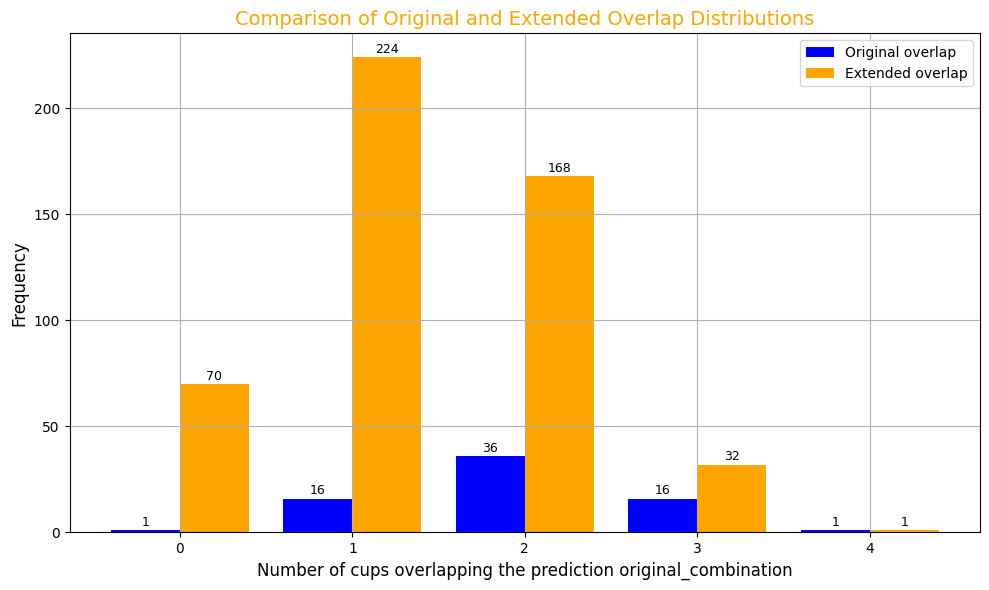

In [24]:
# Original and extended data
original_counts = (np.array([0, 1, 2, 3, 4]), np.array([1, 16, 36, 16, 1]))
extended_counts = (np.array([0, 1, 2, 3, 4]), np.array([70, 224, 168, 32, 1]))

# Bar width and positions
bar_width = 0.4
x = original_counts[0]
x_original = x - bar_width / 2
x_extended = x + bar_width / 2

# Create figure
fig, ax = plt.subplots(figsize=(10, 6))

# Plot bars
ax.bar(x_original, original_counts[1], width=bar_width, color='blue', label='Original overlap')
ax.bar(x_extended, extended_counts[1], width=bar_width, color='orange', label='Extended overlap')

# Labels and title
ax.set_xlabel('Number of cups overlapping the prediction original_combination', fontsize=12, color='black')
ax.set_ylabel('Frequency', fontsize=12, color='black')
ax.set_title('Comparison of Original and Extended Overlap Distributions', fontsize=14,  color='orange')
ax.legend()

# Lets put value labels over the bars- aided by Co-pilot
for x_val, y_val in zip(x_original, original_counts[1]):
    ax.text(x_val, y_val + 2, str(y_val), ha='center', fontsize=9)
for x_val, y_val in zip(x_extended, extended_counts[1]):
    ax.text(x_val, y_val + 2, str(y_val), ha='center', fontsize=9)

plt.tight_layout()
plt.grid(True)
plt.show()

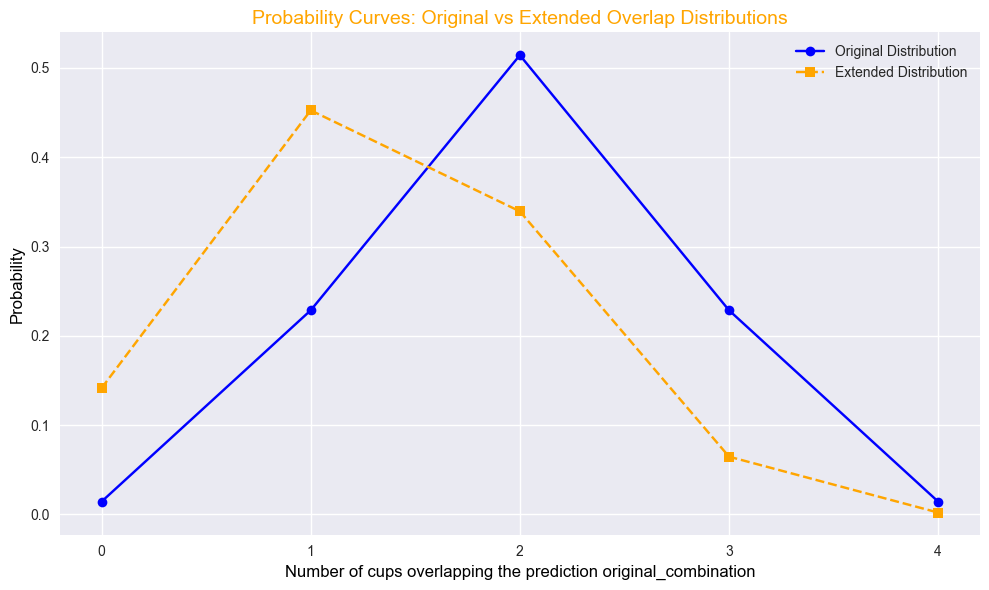

In [25]:
# Creating overlay plot of probability curves for original and extended overlap distributions
# Original and extended frequency data
original_counts = (np.array([0, 1, 2, 3, 4]), np.array([1, 16, 36, 16, 1]))
extended_counts = (np.array([0, 1, 2, 3, 4]), np.array([70, 224, 168, 32, 1]))

# Normalize to convert frequencies into probabilities
original_probs = original_counts[1] / np.sum(original_counts[1])
extended_probs = extended_counts[1] / np.sum(extended_counts[1])

# Create the plot
plt.style.use('seaborn-v0_8') 
plt.figure(figsize=(10, 6))

# Plot original probability curve
plt.plot(original_counts[0], original_probs, label='Original Distribution', color='blue', linestyle='-', marker='o')

# Plot extended probability curve
plt.plot(extended_counts[0], extended_probs, label='Extended Distribution', color='orange', linestyle='--', marker='s')

# Add labels and title
plt.xlabel('Number of cups overlapping the prediction original_combination', fontsize=12, color='black')
plt.ylabel('Probability', fontsize=12, color='black')
plt.title('Probability Curves: Original vs Extended Overlap Distributions', fontsize=14,  color='orange')
plt.legend()
plt.grid(True)

# Force x-axis to show only whole numbers
plt.xticks(np.arange(0, 5, 1))  
plt.tight_layout()
plt.show()

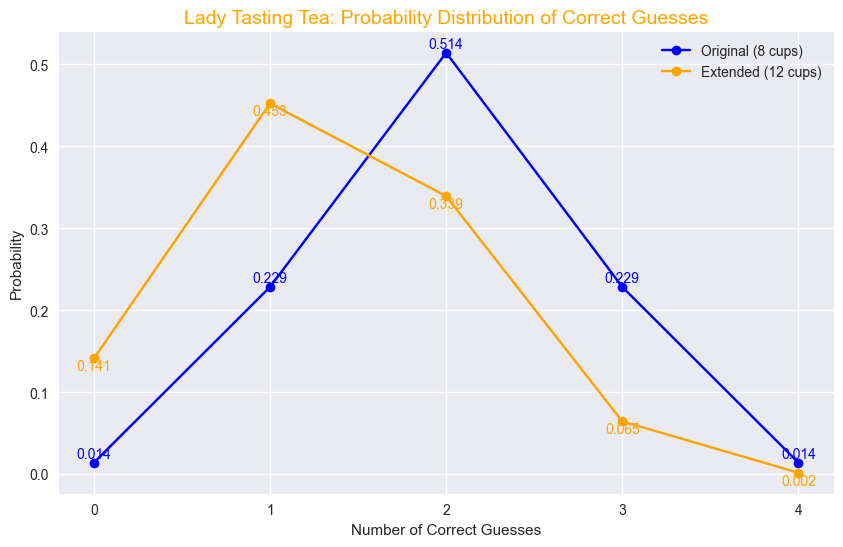

In [26]:
# Enhancing Lady Tasting Tea probability curve with annotations (Microsoft Co-pilot was used to help generate this part)
# Original and extended frequency data
original_x, original_freq = np.array([0, 1, 2, 3, 4]), np.array([1, 16, 36, 16, 1])
extended_x, extended_freq = np.array([0, 1, 2, 3, 4]), np.array([70, 224, 168, 32, 1])

# Normalize the probabilities
original_prob = original_freq / original_freq.sum()
extended_prob = extended_freq / extended_freq.sum()

# Plotting
plt.style.use('seaborn-v0_8')
fig, ax = plt.subplots(figsize=(10, 6))

ax.plot(original_x, original_prob, marker='o', label='Original (8 cups)', color='blue')
ax.plot(extended_x, extended_prob, marker='o', label='Extended (12 cups)', color='orange')

# Annotate each point with its probability
# .3f will limit the output to three decimal places.
for x, p in zip(original_x, original_prob):
    ax.text(x, p + 0.005, f"{p:.3f}", ha='center', color='blue')

for x, p in zip(extended_x, extended_prob):
    ax.text(x, p - 0.015, f"{p:.3f}", ha='center', color='orange')

# Axis formatting
ax.set_xticks(original_x)
ax.set_xlabel("Number of Correct Guesses")
ax.set_ylabel("Probability")
ax.set_title("Lady Tasting Tea: Probability Distribution of Correct Guesses", fontsize=14, color='orange')
ax.legend()
ax.grid(True)

#### <span style="color:orange">**<u>1.4 Discussion & Conclusion</u>**<span>

**The Null Hypothesis, H<sub>0</sub>**
- The lady has no special power to tell the difference between cups of tea with milk in first and cups of tea with tea in first.

- The lady is selecting the four cups from the eight cups at random.

**Alternative Hypothesis, H<sub>1</sub>**
- The lady can tell the difference.

If p > 0.05 = fail to reject H<sub>0</sub> as there is no evidence that means differ.

If p ≤ 0.05 = reject H<sub>0</sub>, because at least one mean differs.

From the above analysis, we can see that the estimated probability of correctly identifying the 4 milk-first cups in the 8-cup set up is *p*=0.014 = 1.4%, and in the 12-cup set is only *p*=0.002 = 0.2%.

This shows that the chance of correctly identifyig all 4 milk_first cups, by guessing, drops dramaticaly in the 12-cup setup therefore making random success highly unlikely. This would suggest that is would be reasonable to relax the *p* value threshold (from 0.05 to 0.10) because the likelihood of a false positive (Type I) error is much lower in the extended iteration of the experiment.



***
***

### <span style="color:red"><u>**Problem 02 - Normal Distribution**</u><span> <a id="problem-02--normal-distribution"></a>

#### <span style="color:orange">**<u>2.1 Assignment Instructions:</u>**<span>

- Generate 100,000 samples of size 10 from the standard normal distribution.

- For each sample, compute the standard deviation with ddof=1 (sample SD) and with ddof=0 (population SD). 

- Plot histograms of both sets of values on the same axes with transparency.

- Describe the differences you see. 

- Explain how you expect these differences to change if the sample size is increased.

***

#### <span style="color:orange">**<u>2.2 Overview</u>**<span>

[Normal Distribution Explained](https://www.geeksforgeeks.org/python/how-to-plot-normal-distribution-over-histogram-in-python/)

- The normal distribution is defined by two key parameters:
  - **Mean (average):** This sets the central point of the curve, where the peak occurs. The distribution is symmetric around this value.
  - **Standard deviation (σ):** This controls how spread out the values are around the mean.
    - A smaller σ produces a tall, narrow curve.
    - A larger σ results in a wider, flatter curve.

***

#### <span style="color:orange">**<u>2.3 Data Analysis</u>**<span>

As stated above, the imports for all problems have been consoidated into a single 'import section' under problem 1.

***

<span style="color:orange">2.3.1. Generate 100,000 samples of size 10 from the standard normal distribution.<span>

[**np.random.seed**](https://numpy.org/doc/stable/reference/random/generated/numpy.random.seed.html)

    np.random.seed()
    
Computers don’t generate truly random numbers; they use algorithms that produce sequences that appear random, pseudo‑random numbers,meaning the same seed produces the same sequence. ``np.random.seed()`` fixes the random number generator’s starting point so results are reproducible.


[**numpy.random.normal**](https://numpy.org/doc/stable/reference/random/generated/numpy.random.normal.html)

    random.normal(loc=0.0, scale=1.0, size=None)

where: 

- ``loc`` is the mean (center) of the **normal distribution**, in this equation=0 (standard normal).

- ``scale`` is the **standard deviation** (spread or "width") of the normal distribution, in this equation=1 (standard normal).

- ``size`` is the shape of the output array, in this equation=(100000, 10) means 100,000 samples each of size 10.

In [27]:
# Reproducibility helps when comparing results
np.random.seed(36)

# Reference: https://numpy.org/doc/stable/reference/random/generated/numpy.random.normal.html
samples_legacy = np.random.normal(loc=0, scale=1, size=(100000, 10))

# Optional: check shape and preview
# Expected output: (100000, 10)
print(samples_legacy.shape) 

# Preview first 5 samples      
print(samples_legacy[:5])         

(100000, 10)
[[ 0.67641327  1.52109919 -0.51187625  1.15019464 -0.59071681 -0.76876525
  -0.33500917  0.09299944 -1.37755311  0.22791697]
 [-0.59016463 -1.29693989 -1.59805879 -0.29740901 -1.45155795 -0.19986179
  -0.55274563  1.95845977 -1.70483391  0.91342904]
 [-0.69192222 -0.67155148  0.54451662  2.23728685  0.1567617  -1.62019266
  -0.49595839 -1.0221763  -2.19713488 -0.25264307]
 [-1.0624605   1.84272185 -0.51878333 -1.09538067  1.41519375 -0.08321447
  -1.30315942 -2.04229364 -0.24882886  0.30578381]
 [ 0.94359627  1.16124917  0.38384684 -0.30460106  0.94789995  1.2267441
  -0.73060454 -0.17236224 -0.69380241 -0.62494595]]


[**<u>Random number generator</u>**](https://numpy.org/doc/stable/reference/random/generator.html)

``numpy.random.*``, functions, such as ``numpy.random.binomial``, have become legacy functions as of NumPy 1.17, although not depreciated it is advised to use ``numpy.random.Generator``. (Reference: https://stackoverflow.com/questions/67703875/np-random-binomial-vs-random-choices-for-simulating-coin-flips)

As an alternative to using ``numpy.random.binomial``, you can set up a modern **NumPy Generator** with ``np.random.default_rng()`` and call its ``.binomial()`` method. This approach is recommended because the old ``np.random.binomial`` belongs to NumPy’s legacy random API, while ``Generator`` provides better reproducibility, performance, and flexibility

**np.random.default_rng(seed)**, creates random number generator.

In [28]:
# Create a generator instance.
rng = np.random.default_rng(seed=42)  # seed for reproducibility

# Generate 100,000 samples of size 10 from N(0,1)
samples = rng.normal(loc=0, scale=1, size=(100000, 10))

# Quick check
print(samples.shape)   # Expected: (100000, 10)
print(samples[:2])     # Show first two samples

(100000, 10)
[[ 0.30471708 -1.03998411  0.7504512   0.94056472 -1.95103519 -1.30217951
   0.1278404  -0.31624259 -0.01680116 -0.85304393]
 [ 0.87939797  0.77779194  0.0660307   1.12724121  0.46750934 -0.85929246
   0.36875078 -0.9588826   0.8784503  -0.04992591]]


<u>**Normality Assessment.**</u>

Lets assess if the randomly generated variables are normally distributed using the following methods:

Visually assessments:

1. [Q-Q Plot](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.probplot.html). 

- ``flatten()``, converts this 2D array into a 1D array (vector) of length 1,000,000.

A QQ plot requires a single sequence of values to compare against theoretical quantiles. By flattening, we treat all simulated values as one continuous dataset rather than keeping them in separate columns.


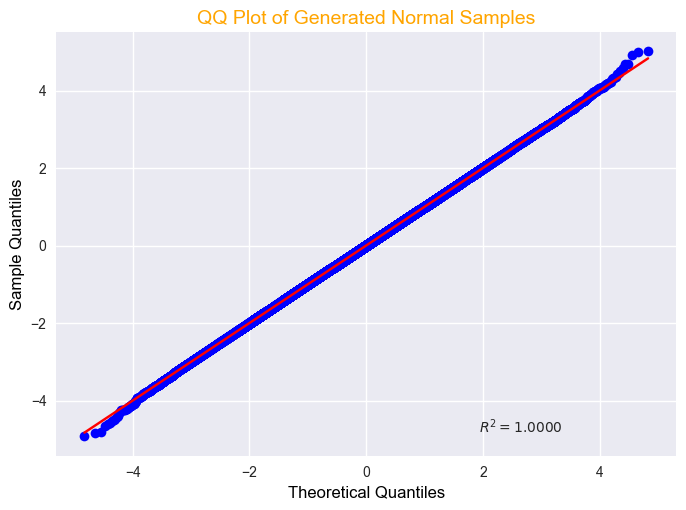

In [29]:
# Flatten the 2D array into 1D for QQ plot
# Reference: https://numpy.org/doc/stable/reference/generated/numpy.ndarray.flatten.html
data = samples.flatten()

# Create QQ plot
# probplot returns (theoretical quantiles, ordered values)
# Reference: https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.probplot.html
stats.probplot(data, dist="norm", plot=plt, rvalue=True)

# Add labels and title
plt.title("QQ Plot of Generated Normal Samples", fontsize=14,  color='orange')
plt.xlabel("Theoretical Quantiles", fontsize=12, color="black")
plt.ylabel("Sample Quantiles", fontsize=12, color="black")

# Show plot
plt.show()

From the Q-Q plot, we can see that **R² = 1.0**.  
A high R² (≈ 0.95–1.0) implies that the data closely follows the theoretical distribution, which in this case is the normal distribution.

***

2. Let statistically verify that the data is normally distributed using the [Shaprio-Wilk Test](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.shapiro.html)

The Shapiro-Wilk test tests the null hypothesis that the data was drawn from a normal distribution.
- if p > 0.05, we fail to reject H<sub>0</sub> (the null hypothesis) hence the data is normally distributed, and
- if p < 0.05, we reject H<sub>0</sub> and can state that the data deviates from normality.

In [30]:
# Perform the Shapiro Wilk test (using the flattened data as generated above for the Q-Q plot)
# Reference: https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.shapiro.html
stat, p = stats.shapiro(data[:5000])  # limit to 5000 values
print("Shapiro-Wilk Statistic:", stat)
print("p-value:", p)

if p > 0.05:
    print("Fail to reject H0: Data looks normally distributed")
else:
    print("Reject H0: Data deviates from normality")


Shapiro-Wilk Statistic: 0.9996559917870854
p-value: 0.5731896958641733
Fail to reject H0: Data looks normally distributed


<u>Shapiro–Wilk Test Results</u>

- Test Statistic: 0.999  
- *p-value*: 0.5798

<u>Interpretation</u>

Since the p=0.5798 which is greater than 0.05, we fail to reject the null hypothesis (H<sub>0</sub>) and conclude that the data does not significantly deviate from normality.  


<u>Conclusion</u> 
- The both the Q-Q plot and the Shapiro–Wilk Test Results indicate that the data is normally distributed.  

***

<span style="color:orange">2.3.2 For each sample, compute the standard deviation with ddof=1 (sample SD) and with ddof=0 (population SD).<span>

[numpy.std](https://numpy.org/doc/stable/reference/generated/numpy.std.html)

    numpy.std(samples, axis=None, ddof=0)

where:

- ``samples`` = the array that we want to compute the standard deviation of.

- ``axis=1``= computes the standard deviation across each row, treating each row as one sample.

- ``ddof=1``= Means **Delta Degrees of Freedom**, and divides by \( n - 1 \), giving the **sample standard deviation** (SSD).

- ``ddof=0``= divides by \( n \), giving the **population standard deviation** (PSD).


In [31]:
# Compute sample standard deviation (ddof=1)
sample_sd = np.std(samples, axis=1, ddof=1)

# Compute population standard deviation (ddof=0)
population_sd = np.std(samples, axis=1, ddof=0)

# Optional: preview
print("Sample SD (first 5):", sample_sd[:5])
print("Population SD (first 5):", population_sd[:5])

Sample SD (first 5): [0.93349439 0.72360698 0.57362142 1.00260986 0.44253044]
Population SD (first 5): [0.88559053 0.68647386 0.54418506 0.95115923 0.41982124]


***

<span style="color:orange">2.3.3 Plot histograms of both sets of values on the same axes with transparency.<span>

- [numpy.mean](https://numpy.org/doc/stable/reference/generated/numpy.mean.html#numpy-mean), was used to help visualise the mean for SSD and PSD, as it computes the arithmetic mean, which is defined as *'
the sum of the elements along the axis divided by the number of elements'* along the specified axis.

This function returns the average of the array elements. The average is taken over the flattened array by default, otherwise over the specified axis.

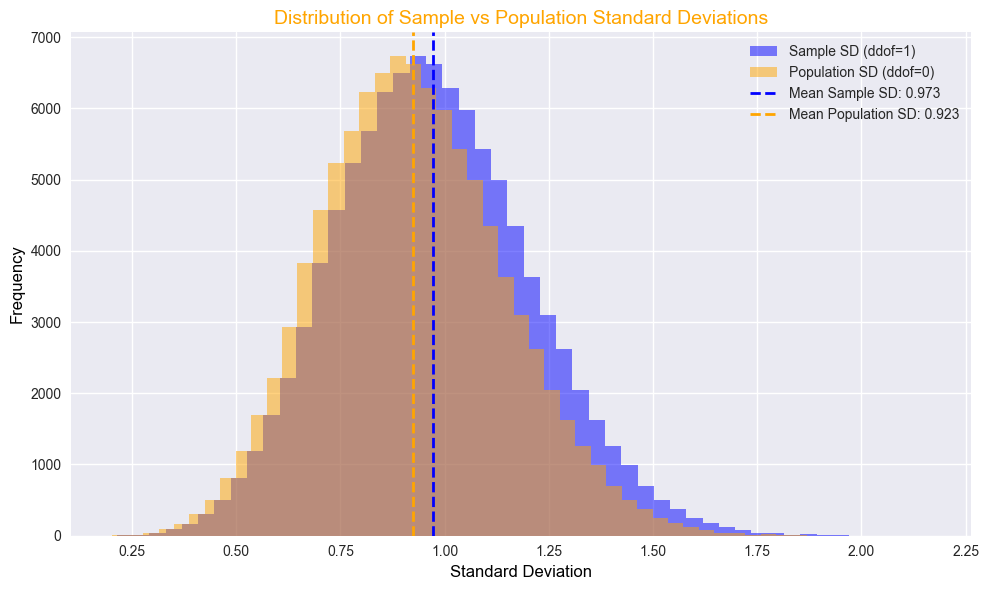

In [32]:
# Calculate means
# After creating the original plot, I decided it would be beneficial to see the mean for each population.
mean_sample = np.mean(sample_sd)
mean_population = np.mean(population_sd)

# Plot histograms
plt.style.use('seaborn-v0_8')

# Create the plot
plt.figure(figsize=(10, 6))
# bins = defines the number of intervals the data is divided into.
# alpha = controls the transparency of the bars.
plt.hist(sample_sd, bins=50, alpha=0.5, label='Sample SD (ddof=1)', color='blue')
plt.hist(population_sd, bins=50, alpha=0.5, label='Population SD (ddof=0)', color='orange')

# Add mean lines
plt.axvline(mean_sample, color='blue', linestyle='dashed', linewidth=2, label=f'Mean Sample SD: {mean_sample:.3f}')
plt.axvline(mean_population, color='orange', linestyle='dashed', linewidth=2, label=f'Mean Population SD: {mean_population:.3f}')

# Add title and labels
plt.title('Distribution of Sample vs Population Standard Deviations', fontsize=14,  color='orange')
plt.xlabel('Standard Deviation', fontsize=12, color='black')
plt.ylabel('Frequency', fontsize=12, color='black')

# Add legend and grid
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


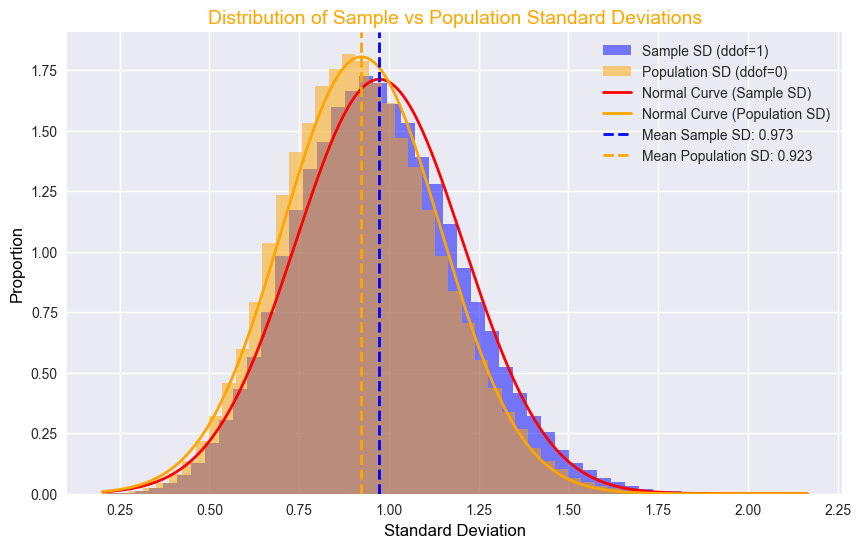

In [33]:
# Compute mean and standard deviation (std) for population distribution
# ddof=0 = population standard deviation (divide by N)
mean_population = np.mean(population_sd)
std_population = np.std(population_sd, ddof=0)

# Compute mean and std for sample distribution
# ddof=1  = sample standard deviation (divide by N-1)
mean_sample = np.mean(sample_sd)
std_sample = np.std(sample_sd, ddof=1)

# Set plot style for cleaner visuals
# Reference: https://matplotlib.org/stable/tutorials/introductory/customizing.html # using-style-sheets
plt.style.use('seaborn-v0_8')

# Create figure with specified size
# Reference: https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.figure.html
plt.figure(figsize=(10, 6))

# Plot normalized histograms (proportions)
# density=True = normalize histogram to proportions (area = 1)
# Reference: https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.hist.html
plt.hist(sample_sd, bins=50, alpha=0.5, label='Sample SD (ddof=1)', color='blue', density=True)
plt.hist(population_sd, bins=50, alpha=0.5, label='Population SD (ddof=0)', color='orange', density=True)

# Generate x values for normal curves
# np.linspace, will create evenly spaced values across range
# Reference: https://numpy.org/doc/stable/reference/generated/numpy.linspace.html
x = np.linspace(min(min(sample_sd), min(population_sd)), 
                max(max(sample_sd), max(population_sd)), 1000)

# Normal distribution curve for sample SD
# norm.pdf, probability density function of normal distribution
# Reference: https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.norm.html
y_sample = norm.pdf(x, loc=mean_sample, scale=std_sample)
plt.plot(x, y_sample, 'r-', linewidth=2, label='Normal Curve (Sample SD)')

# Normal distribution curve for population SD
y_pop = norm.pdf(x, loc=mean_population, scale=std_population)
plt.plot(x, y_pop, 'orange', linewidth=2, label='Normal Curve (Population SD)')

# Add mean lines for both distributions
# axvline = vertical line at given x-value
# Reference: https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.axvline.html
plt.axvline(mean_sample, color='blue', linestyle='dashed', linewidth=2, 
            label=f'Mean Sample SD: {mean_sample:.3f}')
plt.axvline(mean_population, color='orange', linestyle='dashed', linewidth=2, 
            label=f'Mean Population SD: {mean_population:.3f}')

# Add title and labels
# Reference: https://matplotlib.org/stable/tutorials/text/text_intro.html
plt.title('Distribution of Sample vs Population Standard Deviations', fontsize=14, color='orange')
plt.xlabel('Standard Deviation', fontsize=12, color='black')
plt.ylabel('Proportion', fontsize=12, color='black')

# Add legend for clarity
plt.legend()

# Show plot
plt.show()

In [34]:
#  To get a better look at the data, I created a DataFrame, and display descriptive statistics
# df.describe() reports values such as count, mean, standard deviation, minimum, maximum, and selected percentiles (by default 25%, 50%, and 75%). 
# For categorical or object data, it shows the number of entries, the count of unique values, the most frequent value, and its frequency. 
# Reference: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.describe.html
df = pd.DataFrame({
    'Sample_SD': sample_sd,
    'Population_SD': population_sd
})

# Get descriptive statistics
print(df.describe())

           Sample_SD  Population_SD
count  100000.000000  100000.000000
mean        0.973376       0.923425
std         0.233025       0.221067
min         0.213638       0.202675
25%         0.809146       0.767623
50%         0.962518       0.913125
75%         1.126352       1.068551
max         2.165534       2.054406


***

<span style="color:orange">2.3.4. Describe the differences you see.<span>

From the plot of *sample standard deviations* (SSD) versus *population standard deviations* (PSD) we can see that:

- SSD are, on average, slightly larger that the PSD.

- By using the ``alpha=0.5`` parameter in the ``plt.hist`` function, ww can see the overlapping regions when both distributions are similar, however the SSD histogram appears to extend slightly further to the right, showing higher variability.

- With regards to comparing the means, the mean of SSD is slighty greater than PSD.

- Both distribtions are bell-shapped, bu SSD has a wider spread, due to the correction factor. PSD is tighter and more centered around the true standard deviation (=1).

After a little bit of research, it is my undrstanding that the above is due to the fact that SSD corrects for the fact of estimating from incomplete data, where as PSD assumes that you have all the data and does not apply a correction. Numpy implements this via the divisor (n - ddof), so setting ddof=0 divides by n (population), and ddof=1 divides by n-1 (sample). 
(Reference: https://numpy.org/doc/stable/reference/generated/numpy.std.html)


By default, ``ddof=0`` computes PSD, 

$$
\sigma = \sqrt{\frac{1}{n} \sum_{i=1}^{n} (x_i - \mu)^2}
$$

where as ``ddof=1`` SSD, correct for bias when estimating from a sample (Bessel’s correction). 

$$
s = \sqrt{\frac{1}{n-1}\sum_{i=1}^{n} (x_i - \bar{x})^2}
$$

Where:

- 𝜎 : population standard deviation.
- 𝑛: number of observations.
- 𝑥𝑖: each individual value.
- 𝜇: population mean.

(References:
MathJax / Jupyter Markdown — https://docs.mathjax.org/en/latest/ 
Jupyter notebook Markdown math usage (MathJax) — https://jupyter-notebook.readthedocs.io/en/stable/notebook.html#markdown-cells)


***

<span style="color:orange">2.3.5 Explain how you expect these differences to change if the sample size is increased.<span>

- Because SSD uses (Bessel’s correction, *``n-1``*), to correct for bias, the difference between *``n``* and *``n-1``* decreased, therefore SSD would converge towards PSD, reducing the impact of the correction.

- We would expect the distribution of both populations for become narrower and more centerd around the true standard devation.

- Visually, we would expect both histograms to overlap more.

According to the NumPy documentation, ``ddof`` adjusts the divisor to account for sample bias. As sample size increases, the impact of subtracting 1 from 𝑛 decreases, making SSD and PSD nearly equivalent (Reference: https://numpy.org/doc/stable/reference/generated/numpy.std.html)

This can be seen when we run 3 simulations of varying sample size, below.

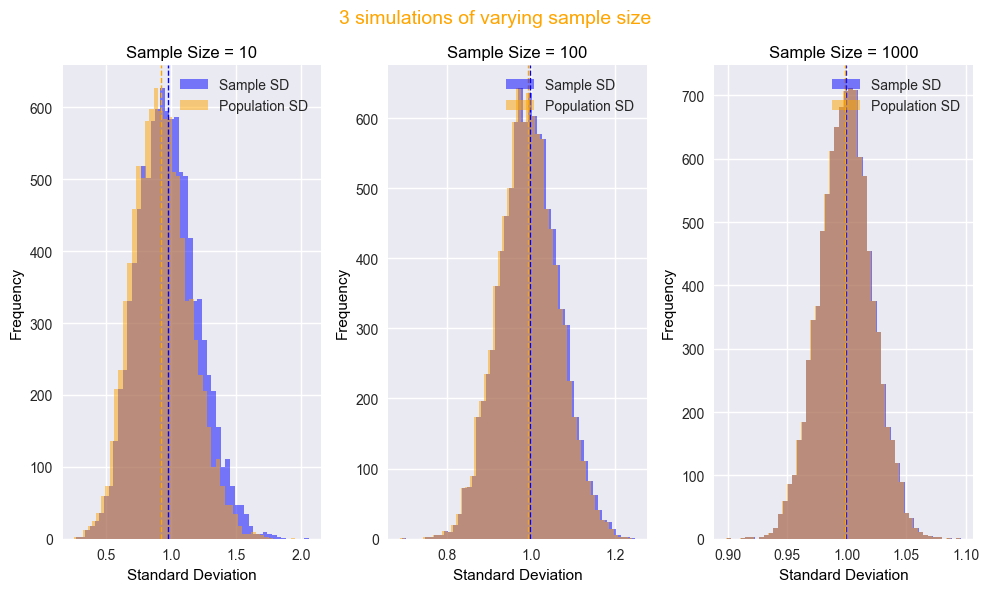

In [35]:
# Sample sizes to test
sample_sizes = [10, 100, 1000]
n_samples = 10000  # Number of samples per size

# Store results
results = []

for size in sample_sizes:
    data = np.random.normal(loc=0, scale=1, size=(n_samples, size))
    sample_sd = np.std(data, axis=1, ddof=1)
    population_sd = np.std(data, axis=1, ddof=0)
    
    # Store mean difference
    results.append({
        'Sample Size': size,
        'Mean Sample SD': np.mean(sample_sd),
        'Mean Population SD': np.mean(population_sd),
        'Mean Difference': np.mean(sample_sd - population_sd)
    })

# Convert to DataFrame
df = pd.DataFrame(results)

# Plot histograms for visual comparison
plt.figure(figsize=(10, 6))
for i, size in enumerate(sample_sizes):
    data = np.random.normal(loc=0, scale=1, size=(n_samples, size))
    sample_sd = np.std(data, axis=1, ddof=1)
    population_sd = np.std(data, axis=1, ddof=0)
    
    plt.subplot(1, 3, i+1)
    plt.hist(sample_sd, bins=50, alpha=0.5, label='Sample SD', color='blue')
    plt.hist(population_sd, bins=50, alpha=0.5, label='Population SD', color='orange')
    plt.axvline(np.mean(sample_sd), color='blue', linestyle='dashed', linewidth=1)
    plt.axvline(np.mean(population_sd), color='orange', linestyle='dashed', linewidth=1)
    plt.title(f'Sample Size = {size}', color='black')
    plt.xlabel('Standard Deviation', color='black')
    plt.ylabel('Frequency', color='black')
    plt.legend()

plt.suptitle("3 simulations of varying sample size", fontsize=14, color='orange')
plt.tight_layout()
plt.show()

#### <span style="color:orange"><u>**2.4 Discussion & Conclusion**</u><span>

This problem set highlights the statistical distinction between sample and population standard deviation, particularly in the context of small sample sizes. By generating 100,000 samples of size 10 from a standard normal distribution, we observed that the sample standard deviation (computed with `ddof=1`) consistently yielded higher values than the population standard deviation (`ddof=0`). This discrepancy arises from Bessel’s correction, which adjusts for bias when estimating variability from incomplete data. The histograms visually confirmed this difference, with the SSD distribution slightly shifted to the right. However, as sample size increases, the impact of this correction reduces. This reinforces a key statistical principle: while bias correction is essential for small samples, its influence fades with larger datasets, making SSD and PSD nearly interchangeable in large-scale analysis.

(Reference; Bessels Correction, https://en.wikipedia.org/wiki/Bessel%27s_correction).

***
***

### <span style="color:red"><u>**Problem 03 -  t-Tests**</u><span> <a id="problem-03--t-tests"></a>

<span style="color:orange"><u>Hypothesis testing</u><span>

[Hypothesis testing](https://www.scribbr.com/statistics/hypothesis-testing/,https://www.jmp.com/en/statistics-knowledge-portal/inferential-statistics/hypothesis-testing) is a statistical method for deciding whether evidence supports a claim about a population. It begins with formulating a **null hypothesis (H<sub>0</sub>)** and an **alternative hypothesis (H<sub>1</sub>)**, then using sample data to decide whether to reject H₀. 

 - **Null hypothesis (H<sub>0</sub>)**, assumes no effect or no difference.
 - **Alternative hypothesis (H<sub>1</sub>)**, suggests there is an effect or difference.

In hypothesis testing, the significant level (aplha = α) is commonly set at 0.05, and this is the threshold for deciding whether results are unlikely under H<sub>0</sub>. After collecting data and computing a test-statistic, we can calcutate the probability of observing data (*p-value*), if the null hypothesis (H<sub>0</sub>) is true. 

In this process, two kinds of mistakes can occur:

1. Type I error (rejecting a true null), and

2. Type II error (failing to reject a false null).

**<u>Errors in Hypothesis Testing</u>**

| Error Type       | Definition                                      | Also Called     | Example                                      |
|------------------|-------------------------------------------------|-----------------|----------------------------------------------|
| **Type I Error** | Rejecting H₀ when it is actually true            | False positive  | Concluding a drug works when it doesn’t       |
| **Type II Error**| Failing to reject H₀ when it is actually false   | False negative  | Concluding a drug doesn’t work when it does   |

---
**<u>Key Points</u>**

- **Type I error probability = α**, alpha (significance level chosen by researcher).  
- **Type II error probability = β**, beta (depends on sample size, effect size, and variability).  
- **Power of a test = 1 − β**, (the probability of correctly rejecting a false null).  
- **Trade‑off:** Lowering α reduces Type I errors but increases the chance of Type II errors.  
- **Sample size matters:** Larger samples reduce both errors by providing more precise estimates.  

<u>References:</u> [Scribbr – Type I & Type II Errors Explained](https://www.scribbr.com/statistics/type-i-and-type-ii-errors/) , [GeeksforGeeks – Type I and Type II Errors in Statistics](https://www.geeksforgeeks.org/data-science/type-i-and-type-ii-errors/), [Statology – Understanding Type I and Type II Errors](https://www.statology.org/understanding-type-errors/)  

<span style="color:orange">[<u>The t-test</u><span>](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_ind.html)

This is a test for the null hypothesis H<sub>0</sub>, that requires 2 independent samples that have identical average values, assuming the populations have identical variances.

    ttest_ind(a, b, *, axis=0, equal_var=True, nan_policy='propagate')

where: 
- a, b = sample populations that the test is to be conducted on.
- equal_var = this can be True (default) or False. If False, perform Welch’s t-test, which does not assume equal population variance.
- nan_policy= defines how to handle input NaNs ( with three options, ``propagate``, ``omit``or ``raise``.)

The results returned include:
- statistic= the t-statistic.
- *p-value*= the probability asociated with the given alternative.
- df= The number of degrees of freedom used in calculation of the t-statistic.
(Reference: https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_ind.html)

<span style="color:orange"><u>Assumptions of the t-test</u><span>

1. **Independence of observations**: Independent observations. Values in one group must not influence values in another. The dependent variable should be measured on a continuous scale (interval or ratio). Categorical or ordinal data are not appropriate for parametric t‑tests.

2. **Normality**: Both samples are approximately normally distributed.

3. **Homogeneity** of variance (equal variances). For independent samples t‑tests, the variability in each group should be similar.

4. **Random sampling** Ideally, samples should be drawn randomly from the population to ensure representativeness.

***

#### <span style="color:orange"><u>**3.1 Assignment Instructions:**</u><span>

A type II error occurs when a test fails to reject the null hypothesis even though it is false.
For each mean difference $d = 0, 0.1, 0.2, \dots, 1.0$, repeat the following simulation 1,000 times:

- Draw two samples of size 100, one from the standard normal distribution and one from the normal distribution with mean $d$ and standard deviation 1.
- Run an independent samples t-test on the two samples, rejecting the null hypothesis if the p-value <0.05.
- Record the proportion of times the null hypothesis is not rejected.

#### <span style="color:orange"><u>**3.2 Objective**</u><span>

Plot this proportion against $d$, and explain how the **Type II error** rate changes as the difference in means increases.

#### <span style="color:orange"><u>**3.3 Analysis**</u><span>

<span style="color:red">As stated above, the imports for all problems have been consolidated into a single 'import section' under problem 1.<span>

<span style="color:orange">3.3.1- Draw two samples of size 100, one from the standard normal distribution and one from the normal distribution with mean $d$ and standard deviation 1.<span>

For a given mean difference d, draw two samples:
- sample_a ~ N(0, 1): the "control" group with mean 0 and sd 1
- sample_b ~ N(d, 1): the "treatment" group with mean d and sd 1

Both samples have size n = 100 as specified.

As explained in  **Problem 2**, we will use **NumPy Generator** with ``np.random.default_rng()`` and call its ``.binomial()`` method, to generate the necessary random numbers, with the seed '36' to ensure reproducibility.

In [ ]:
# Sample population generation.
# Create a reproducible Generator instance
# 'Seed' is used to ensure reproducibility
rng = np.random.default_rng(seed=36)

# Set up the parameters for the simulation
# Simulation setup
n = 100                             # sample size per group
sigma = 1.0                         # known population SD for both groups
mean_diffs = np.arange(0, 1.1, 0.1) # effect sizes to test (mu2 - mu1)
n_sims = 1000                       # number of repetitions
alpha = 0.05                        # significance level for the test 

Lets visual how the spread varies with varying the ``mean diff``.

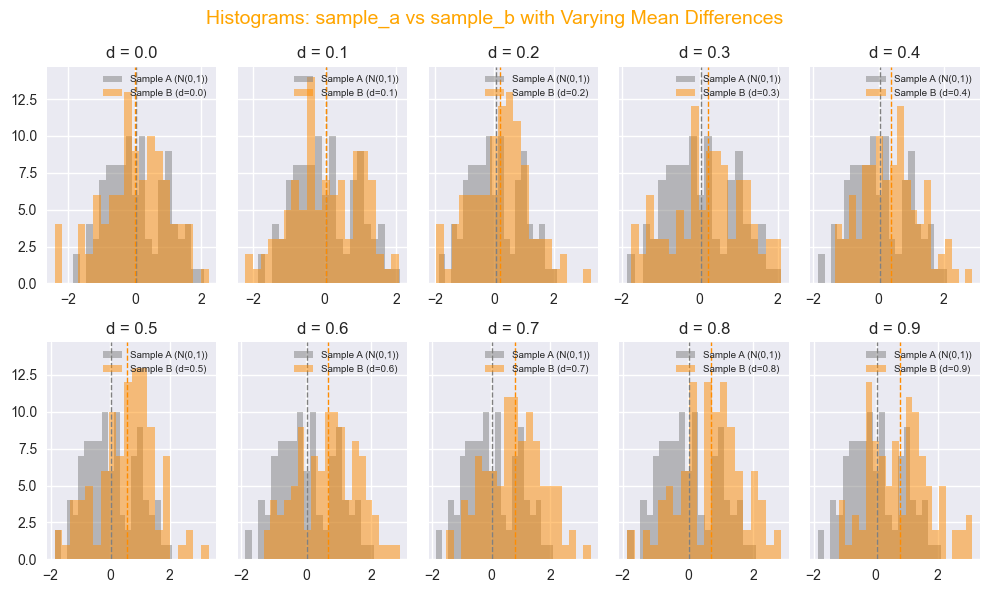

In [37]:
# Generate one fixed sample_a
sample_a = rng.normal(loc=0.0, scale=sigma, size=n)

# Generate sample_b for each mean difference
samples_b = [rng.normal(loc=d, scale=sigma, size=n) for d in mean_diffs]

# Plot histograms side by side
fig, axes = plt.subplots(2, 5, figsize=(10,6), sharey=True)

for ax, d, sample_b in zip(axes.flatten(), mean_diffs, samples_b):
    # Histogram for sample_a (fixed)
    ax.hist(sample_a, bins=20, alpha=0.5, color='grey', label='Sample A (N(0,1))')
    
    # Histogram for sample_b (shifted mean)
    ax.hist(sample_b, bins=20, alpha=0.5, color='darkorange', label=f'Sample B (d={d:.1f})')
    
    # Add mean lines for clarity
    ax.axvline(sample_a.mean(), color='grey', linestyle='--', linewidth=1)
    ax.axvline(sample_b.mean(), color='darkorange', linestyle='--', linewidth=1)
    
    ax.set_title(f"d = {d:.1f}")
    ax.legend(fontsize=7)

plt.suptitle("Histograms: sample_a vs sample_b with Varying Mean Differences", fontsize=14, color='orange')
plt.tight_layout()
plt.show()

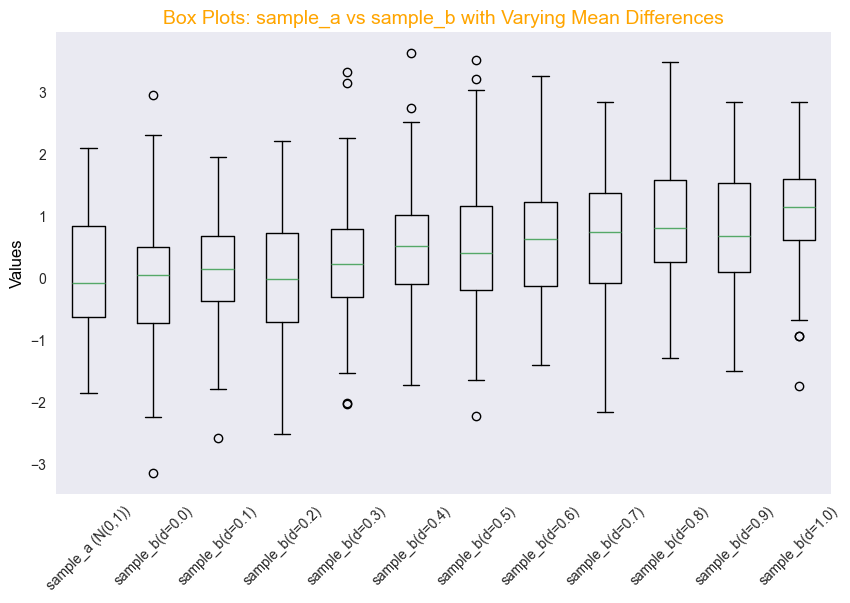

In [38]:
# Box Plot Visualization of Samples with Varying Mean Differences
# Store samples for plotting
samples_b = []

for d in mean_diffs:
    # Generate sample_b with mean difference d
    sample_b = rng.normal(loc=d, scale=sigma, size=100)
    samples_b.append(sample_b)

# Combine into a list for plotting
all_samples = [sample_a] + samples_b
labels = ["sample_a (N(0,1))"] + [f"sample_b(d={d:.1f})" for d in mean_diffs]

# Create box plots
plt.figure(figsize=(10,6))
plt.boxplot(all_samples, tick_labels=labels, vert=True)  # use tick_labels instead of labels

# Styling
plt.xticks(rotation=45)
plt.title("Box Plots: sample_a vs sample_b with Varying Mean Differences", fontsize=14, color='orange')
plt.ylabel("Values", fontsize=12, color='black')
plt.grid(False)
plt.show()


<span style="color:orange">3.3.2 Run an independent samples [t-test](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_ind.html) on the two samples, rejecting the null hypothesis if the p-value is less than 0.05 and record the proportion of times the null hypothesis is not rejected.<span>

For this part of the assignment, it will be necessary to use a ``for`` loop, to iteratie through the various mean differences and also to repeat the simulation 1000 times (``n_sims``). Within this loop, the two sample populations ``sample_a`` (loc=0.0, scale= sigma and size=n), and ``sample_b`` (loc=d, scale= sigma and size=n).

where:
- ``loc`` = the mean (this will be equal 0.0, as we are drawing from a standard normal distribution)
- ``scale`` = standard deviation (this will vary for ``sample_b`` for each iteration) (sigma will = 1.0, as defined in our parameters)
- ``size`` = number of samples. For this problem, ``n``=100.

In [39]:
# Run simulations 
# Keys = mean differences (d values), Values = proportion of Type II errors
# Dictionary to store results:
type2_results = {}

# Create a 'for' loop so that we can iterate through the mean differences (mean diff)
for d in mean_diffs:
    fail_to_reject = 0   # counter for how many times we fail to reject H0
    
    # This inner loop runs 1000 simulations for each 
    # Repeat the simulation n_sims times= 1000 repetitions
    for _ in range(n_sims):
        # Sample generation: `sample_a` from N(0,1), `sample_b` from N(d,1).  
        # sample_a ~ N(0, 1) → standard normal distribution
        sample_a = rng.normal(loc=0.0, scale=sigma, size=n)
        
        # sample_b ~ N(d, 1) → normal distribution shifted by mean difference d
        sample_b = rng.normal(loc=d, scale=sigma, size=n)
        
        # Perform independent samples t-test
        t_stat, p_value = ttest_ind(sample_a, sample_b, equal_var=False)
        
        # Decision rule
        # If p-value >= alpha (0.05), we fail to reject H0
        # This counts as a Type II error whenever d ≠ 0 (because H0 is false)
        if p_value >= alpha:
            fail_to_reject += 1
    
    # Record results
    # Proportion of Type II errors = (# fail to reject) / (# simulations)
    type2_results[d] = fail_to_reject / n_sims

# Display dictionary of results
type2_results

{np.float64(0.0): 0.948,
 np.float64(0.1): 0.895,
 np.float64(0.2): 0.715,
 np.float64(0.30000000000000004): 0.441,
 np.float64(0.4): 0.185,
 np.float64(0.5): 0.067,
 np.float64(0.6000000000000001): 0.01,
 np.float64(0.7000000000000001): 0.002,
 np.float64(0.8): 0.0,
 np.float64(0.9): 0.0,
 np.float64(1.0): 0.0}

<span style="color:orange">3.3.3 Plot this proportion against *d*, and explain how the type II error rate changes as the difference in means increases.<span>

Where:

- x-axis = mean differences (keys of type2_results)
- y-axis = Type II error proportions (values of type2_results)

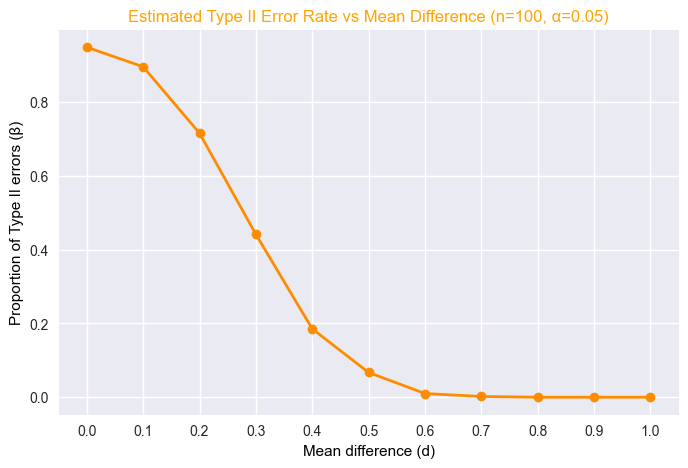

In [40]:
# Create a new figure for the plot
plt.figure(figsize=(8,5)) 

# Plot the results:
plt.plot(
    list(type2_results.keys()),       # mean differences d = 0, 0.1, ..., 1.0
    list(type2_results.values()),     # corresponding Type II error rates
    marker='o',color='darkorange', linewidth=2
)

# Force x-axis ticks to show 0.0, 0.1, ..., 1.0
plt.xticks(np.arange(0, 1.1, 0.1))

# Add a descriptive title to the plot
plt.title("Estimated Type II Error Rate vs Mean Difference (n=100, α=0.05)",color="orange")

# Label axis
plt.xlabel("Mean difference (d)", color="black")
plt.ylabel("Proportion of Type II errors (β)", color="black")
plt.grid(True)

# Display the plot
plt.show()

#### <span style="color:orange"><u>**3.4 Conclusions**</u><span>

<span style="color:orange">Explain how the type II error rate changes as the difference in means increases.<span>

When the mean difference is close to 0 the two samples will overlap heavily, hence the test will struggle to detect any difference, so the **Type II** error rate is high. In practice, this means we often fail to reject H<sub>0</sub> even though it is false.

As the mean difference increases, the separation between the two samples becomes more apparant, and the t‑test increases in the probability of correctly rejecting a false H<sub>0</sub>. Consequently, the **Type II** error rate decreases because the test is more likely to detect the difference.

Overall, as the mean difference grows, the probability of a Type II error falls and larger sample sizes, small mean differences can be detected, further reducing **Type II** error rate.

***
***

### <span style="color:red"><u>**Problem 04 -  ANOVA**</u><span> <a id="problem-04--anova"></a>

<span style="color:orange"><u>ANOVA</u><span>

The acronoym stands for <u>**AN**</u>alysis <u>**O**</u>f <u>**VA**</u>riance and is a statistical technique used to assess whether the means of three or more independent groups differ significantly. It evaluates the null hypothesis, H<sub>0</sub>, that all group means are equal by examining two sources of variation:

Between‑group variation: how much the group averages differ from one another.

Within‑group variation: the natural variability among individuals inside each group.

The test produces an F‑statistic, which compares these two types of variation. If the differences between groups are much greater than the variation within groups, ANOVA indicates that at least one group mean is distinct. If not, the observed differences are likely due to random chance.

(Reference: https://www.geeksforgeeks.org/maths/anova-formula/)

We use scipy.stats. [``f_oneway``](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.f_oneway.html) to test whether the means of two or more groups are equal.

    f_oneway(*samples, equal_var=True)

Where:

- ``samples`` = the data you wish to compare, with a minimum of two samples.
- This test assumes equal variance w=between the populations, ``equal_var=True``, which is also the default option, however if ``equal_var=False``, the variances are not equal, is it best to perform Welch’s ANOVA.

This test will return:

- statistic = The computed F statistic of the test.
- *p_value* = The associated p-value from the F distribution.

The assumptions of this function are:

1. Independence of samples
2. Normality within each group
3. Homogeneity of variances

<span style="color:orange"><u>Tukey Test, for post hoc analysis</u><span>

When an ANOVA indicates that not all group means are equal, a post‑hoc procedure is needed to identify which specific groups differ. [Tukey’s](https://www.geeksforgeeks.org/data-science/tukey-kramer-test-for-post-hoc-analysis/) Honest Significant Difference (HSD) test is a widely used multiple comparison method for this purpose. 

It works by performing pairwise comparisons between group means and evaluating whether the observed differences are statistically significant. The test uses a critical range, to determine if the absolute mean differences exceed what would be expected by chance. 

In practice, Tukey’s HSD is applied only after rejecting the ANOVA null hypothesis, and it provides a clear way to pinpoint which group pairs show meaningful differences in their population means.

#### <span style="color:orange"><u>**4.1 Assignment Instructions:**</u><span>

Generate three independent samples, each of size 30, from normal distributions, with means 0, 0.5, and 1, each with standard deviation 1.
- Perform a one-way ANOVA to test whether all three means are equal.
- Perform three independent two-sample t-tests: samples 1 vs 2, 1 vs 3, and 2 vs 3.
- Compare the conclusions.

Write a short note on why ANOVA is preferred over running several t-tests.

#### <span style="color:orange"><u>**4.2 Objective**</u><span>

Compare and contrast the results of an ANOVA versus independent t-tests, for the same 3 samples.


#### <span style="color:orange"><u>**4.3 Analysis**</u><span>

<span style="color:red">As stated above, the imports for all problems have been consolidated into a single 'import section' under problem 1.<span>

<span style="color:orange">4.3.1 Generate three independent samples, each of size 30, from normal distributions, with means 0, 0.5, and 1, each with standard deviation 1.<span>

As explained in  **Problem 2**, we will use **NumPy Generator** with ``np.random.default_rng()`` to generate the necessary random numbers, with the seed '36' to ensure reproducibility.

In [41]:
# Sample data generation, using seed 36.
rng = np.random.default_rng(36)

# First sample.
sample_x = rng.normal(loc=0, scale=1.0, size=30)

# Second sample.
sample_y = rng.normal(loc=0.5, scale=1.0, size=30)

# Third sample.
sample_z = rng.normal(loc=1.0, scale=1.0, size=30)

<u>**Normality Assessment.**</u>

Lets assess if the randomly generated variables are normally distributed using the following methods:

Visually assessments:

1. [<u>Q-Q Plot</u>](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.probplot.html). There is no need to flatten the data, as this problem is analysing one dimensional data (1D).

[``probplot``](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.probplot.html#scipy.stats.probplot) was used to calculate quantiles for a probability plot, as it generates a probability plot of sample data against the quantiles of a specified theoretical distribution (the normal distribution by default). ``probplot`` optionally calculates a best-fit line for the data and plots the results using Matplotlib.

    probplot(x, sparams=(), dist='norm', fit=True, plot=None, rvalue=False)

Where;
- ``x`` = data from which ``probplot`` creates the plot.
- ``dist`` = distribution function name. The default is ‘norm’ for a normal probability plot.
- ``plot`` = plots the quantiles. 
- ``r`` = if plot is provided and fit is True, setting rvalue to True includes the coefficient of determination on the plot. Default is False.

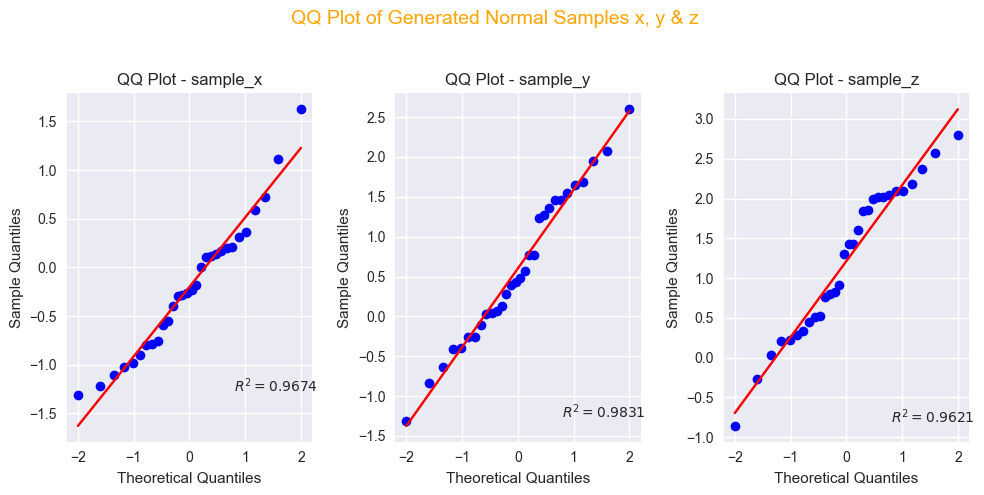

In [ ]:
# Set up the figure and axes for three QQ plots side by side
fig, axes = plt.subplots(1, 3, figsize=(10, 5))

# Create QQ plots for each sample
# probplot returns (theoretical quantiles, ordered values)
# Reference: https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.probplot.html
stats.probplot(sample_x, dist="norm", plot=axes[0], rvalue=True)
axes[0].set_title("QQ Plot - sample_x")
axes[0].set_xlabel("Theoretical Quantiles")
axes[0].set_ylabel("Sample Quantiles")

stats.probplot(sample_y, dist="norm", plot=axes[1], rvalue=True)
axes[1].set_title("QQ Plot - sample_y")
axes[1].set_xlabel("Theoretical Quantiles")
axes[1].set_ylabel("Sample Quantiles")

stats.probplot(sample_z, dist="norm", plot=axes[2], rvalue=True)
axes[2].set_title("QQ Plot - sample_z")
axes[2].set_xlabel("Theoretical Quantiles")
axes[2].set_ylabel("Sample Quantiles")

# Add a super-title for the whole figure
fig.suptitle("QQ Plot of Generated Normal Samples x, y & z", fontsize=14,  color='orange')

# Adjust layout and show
plt.tight_layout(rect=[0, 0, 1, 0.95])  # leave space for suptitle
plt.show()

From the Q-Q plot, we can see that:

- ``sample_x`` = **R² = 0.9674**
- ``sample_y`` = **R² = 0.9831**
- ``sample_z`` = **R² = 0.9621**

A high R² (≈ 0.95–1.0) implies that the data closely follows the theoretical distribution, this is the case for all three samples, that is they visually look to be of a normal distribution.

***

2. Let statistically verify that the data is normally distributed using the [<u>Shaprio-Wilk Test</u>](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.shapiro.html)

The Shapiro-Wilk test tests the null hypothesis H<sub>0</sub> that the data was drawn from a normal distribution.
- if p > 0.05, we fail to reject H<sub>0</sub> (the null hypothesis) hence the data is normally distributed, and
- if p < 0.05, we reject H<sub>0</sub> and can state that the data deviates from normality.

In [43]:
# Applying the Shapiro–Wilk test for normality to each of the three samples x,y & z.
# The Shapiro–Wilk test checks the null hypothesis, H0, that data is normally distributed.
# Returns: statistic (W) and p-value.
# Reference: https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.shapiro.html

for name, sample in zip(["sample_x", "sample_y", "sample_z"], [sample_x, sample_y, sample_z]):
    stat, p = stats.shapiro(sample)
    print(f"{name}: Shapiro-Wilk W={stat:.3f}, p-value={p:.3f}")

    # Interpret the p-value
    if p > 0.05:
        print("Fail to reject H0: Data looks normally distributed.")
    else:
        print("Reject H0: Data deviates from normality.")

sample_x: Shapiro-Wilk W=0.967, p-value=0.454
Fail to reject H0: Data looks normally distributed.
sample_y: Shapiro-Wilk W=0.979, p-value=0.799
Fail to reject H0: Data looks normally distributed.
sample_z: Shapiro-Wilk W=0.956, p-value=0.240
Fail to reject H0: Data looks normally distributed.


<u>Shapiro–Wilk Interpretation</u>

Since:

- ``sample_x`` = *p-value* = 0.454 is > 1, 
- ``sample_y`` = *p-value* = 0.799 is > 1, and
- ``sample_z`` = *p-value* = 0.240 is > 1, 

therefore we fail to reject the null hypothesis (H<sub>0</sub>) and conclude that the data looks normally distributed.

<u>Conclusion</u> 

Both the Q-Q plot and the Shapiro–Wilk Test Results indicate that all the data is normally distributed.  

***

To visualise if the generated samples follow a normal distribution, we will plot the distribution of each sample, along with their associated mean and normal curve, using the same theory as for problem 2 (explaination and references available in P2)

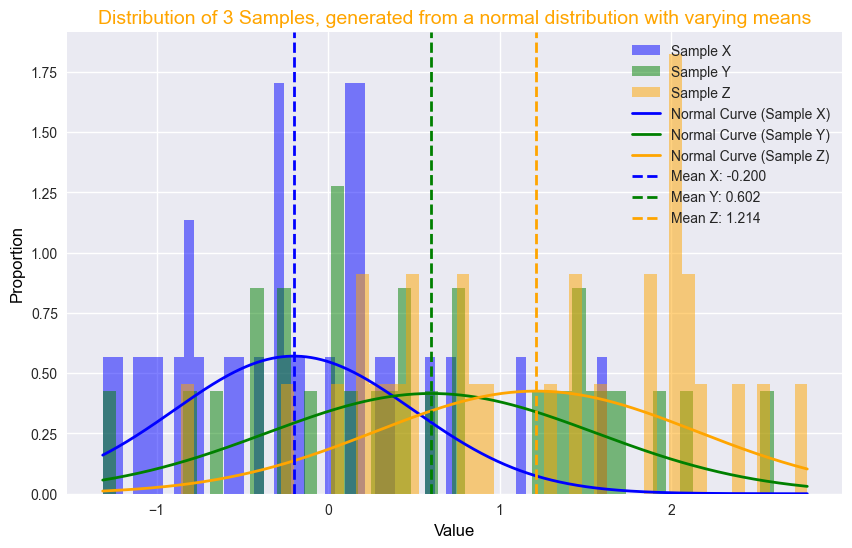

In [44]:
# Compute mean and standard deviation for each sample
# ddof=1 = sample standard deviation (unbiased estimator)
mean_sample_x = np.mean(sample_x)
std_sample_x = np.std(sample_x, ddof=1)

mean_sample_y = np.mean(sample_y)
std_sample_y = np.std(sample_y, ddof=1)

mean_sample_z = np.mean(sample_z)
std_sample_z = np.std(sample_z, ddof=1)

# Set plot style for better aesthetics
# Reference: https://matplotlib.org/stable/tutorials/introductory/customizing.html
plt.style.use('seaborn-v0_8')

# Create figure with specified size
plt.figure(figsize=(10, 6))

# Plot normalized histograms for each sample
plt.hist(sample_x, bins=50, alpha=0.5, label='Sample X', color='blue', density=True)
plt.hist(sample_y, bins=50, alpha=0.5, label='Sample Y', color='green', density=True)
plt.hist(sample_z, bins=50, alpha=0.5, label='Sample Z', color='orange', density=True)

# Generate x values for normal curves
x = np.linspace(min(sample_x.min(), sample_y.min(), sample_z.min()), 
                max(sample_x.max(), sample_y.max(), sample_z.max()), 1000)

# Plot normal distribution curves for each sample
plt.plot(x, norm.pdf(x, loc=mean_sample_x, scale=std_sample_x),
         color='blue', linewidth=2, label='Normal Curve (Sample X)')
plt.plot(x, norm.pdf(x, loc=mean_sample_y, scale=std_sample_y),
         color='green', linewidth=2, label='Normal Curve (Sample Y)')
plt.plot(x, norm.pdf(x, loc=mean_sample_z, scale=std_sample_z),
         color='orange', linewidth=2, label='Normal Curve (Sample Z)')

# Add mean lines for each sample
plt.axvline(mean_sample_x, color='blue', linestyle='dashed', linewidth=2,
            label=f'Mean X: {mean_sample_x:.3f}')
plt.axvline(mean_sample_y, color='green', linestyle='dashed', linewidth=2,
            label=f'Mean Y: {mean_sample_y:.3f}')
plt.axvline(mean_sample_z, color='orange', linestyle='dashed', linewidth=2,
            label=f'Mean Z: {mean_sample_z:.3f}')

# Add title and labels
plt.title('Distribution of 3 Samples, generated from a normal distribution with varying means',
           fontsize=14,  color='orange'
           )
plt.xlabel('Value', fontsize=12, color='black')
plt.ylabel('Proportion', fontsize=12, color='black')
plt.legend()
plt.show()

<span style="color:orange">4.3.2 Perform a one-way ANOVA to test whether all three means are equal.<span>

This script performs a **one-way ANOVA** to test the null hypothesis (H<sub>0</sub>):

Interpretation:
- If p > 0.05 = fail to reject H<sub>0</sub> as there is no evidence that means differ.
- If p ≤ 0.05 = reject H<sub>0</sub>, because at least one mean differs.

In [ ]:
# We use scipy.stats.f_oneway to test whether the means of two or more groups are equal.
# Reference: https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.f_oneway.html
f_stat, p_value = stats.f_oneway(sample_x, sample_y, sample_z)

# Display the results
print(f"One-way ANOVA results:")
print(f"F-statistic = {f_stat:.3f}")
print(f"p-value     = {p_value:.3f}")

# Interpretation of the p-value
if p_value > 0.05:
    print("Fail to reject H0: The three sample means look equal.")
else:
    print("Reject H0: At least one sample mean differs.")

One-way ANOVA results:
F-statistic = 19.782
p-value     = 0.000
Reject H0: At least one sample mean differs.


After utilising the ANOVA test, and concluding that we reject H<sub>0</sub>, it is standard practice to follow up with ``Tukey test`` so that we can see where the difference lies, i.e. which sample is different (Reference: https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.tukey_hsd.html).

In [46]:
# Perform Tukey’s HSD test directly with SciPy
# Reference: https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.tukey_hsd.html
result = stats.tukey_hsd(sample_x, sample_y, sample_z)

# Print results
print(result)

Pairwise Group Comparisons (95.0% Confidence Interval)
Comparison  Statistic  p-value  Lower CI  Upper CI
 (0 - 1)     -0.802     0.002    -1.339    -0.264
 (0 - 2)     -1.414     0.000    -1.951    -0.876
 (1 - 0)      0.802     0.002     0.264     1.339
 (1 - 2)     -0.612     0.022    -1.149    -0.074
 (2 - 0)      1.414     0.000     0.876     1.951
 (2 - 1)      0.612     0.022     0.074     1.149



From the results of the ``Tukey Test``, we can see that the comparision between ``sample_x`` and ``sample_z`` returned a *p-value*= 0.005, which is < 0.05, therefore we reject H<sub>0</sub> and conclude that there is a significant difference between these two samples.

To assess which sample mean differs within the 3 samples, we are going to use [``df.describe()``](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.describe.html) to generate descriptive statistics for each of the samples.

[Descriptive statistics](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.describe.html) are used to produce summary statistics for a DataFrame or Series. 

- For numeric data, it reports values such as count, mean, standard deviation, minimum, maximum, and selected percentiles (by default 25%, 50%, and 75%). 
- For categorical or object data, it shows the number of entries, the count of unique values, the most frequent value, and its frequency. 

When applied to a DataFrame with mixed data types, the default behavior is to summarize only numeric columns, but you can include or exclude specific types using parameters like include or exclude.

This method is especially useful for quickly checking the distribution and spread of your data, spotting potential anomalies, and confirming whether your dataset behaves as expected before deeper statistical analysis.


In [47]:
# Create a DataFrame from the samples
# Each sample becomes a column in the DataFrame
df = pd.DataFrame({"sample_x": sample_x, "sample_y": sample_y,"sample_z": sample_z})

# Apply .describe() to all columns
# Reference: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.describe.html
df.describe()


,sample_x,sample_y,sample_z
count,30.000000,30.000000,30.000000
mean,-0.200029,0.601748,1.213550
std,0.698770,0.959198,0.937072
min,-1.312396,-1.314459,-0.857466
25%,-0.779609,-0.077985,0.466764
50%,-0.249976,0.460111,1.367958
75%,0.188859,1.430571,2.018856
max,1.624787,2.598100,2.794383


The Tukey HSD test identified sample_x and sample_z as significantly different because:

- Their means differ by ~0.85, which is substantial relative to the shared standard deviation (~1.0).
- Their medians and quartiles are shifted, showing a consistent difference in central tendency.

With similar variability across groups, the difference in means stands out clearly.

<span style="color:orange">4.3.3 Perform three independent two-sample t-tests: samples 1 vs 2, 1 vs 3, and 2 vs 3.<span>

We are going to 

The function stats.ttest_ind(a, b) computes:

- t-statistic: measures difference between means relative to variability
- p-value: probability of observing such a difference if null hypothesis is true

Null hypothesis (H<sub>0</sub>): The two samples have equal means
Alternative hypothesis (H<sub>1</sub>): The two samples have different means

Interpretation Guide

- If p-value < 0.05: Reject H<sub>0</sub>, significant difference between samples
- If p-value >= 0.05: Fail to reject H<sub>0</sub>, no significant difference

F=I have formated the output to 4 decimal places for clarity using ``.4f``.

In [48]:
# Perform independent two-sample t-tests between each pair of samples
# Test 1: sample_x vs sample_y
t_stat_xy, p_value_xy = stats.ttest_ind(sample_x, sample_y)

# Test 2: sample_x vs sample_z
t_stat_xz, p_value_xz = stats.ttest_ind(sample_x, sample_z)

# Test 3: sample_y vs sample_z
t_stat_yz, p_value_yz = stats.ttest_ind(sample_y, sample_z)

# Print results
print("Independent Two-Sample t-tests Results:")
print("-------------------------------------------------------------")
print(f"sample_x vs sample_y: t-statistic = {t_stat_xy:.4f}, p-value = {p_value_xy:.4f}")
print(f"sample_x vs sample_z: t-statistic = {t_stat_xz:.4f}, p-value = {p_value_xz:.4f}")
print(f"sample_y vs sample_z: t-statistic = {t_stat_yz:.4f}, p-value = {p_value_yz:.4f}")
print("-------------------------------------------------------------")

# Interpret results for each comparison
alpha = 0.05  # significance level

def interpret_ttest(p, group1, group2):
    if p > alpha:
        print(f"{group1} vs {group2}: Fail to reject H0. No significant difference in means.")
    else:
        print(f"{group1} vs {group2}: Reject H0. Significant difference in means.")

interpret_ttest(p_value_xy, "sample_x", "sample_y")
interpret_ttest(p_value_xz, "sample_x", "sample_z")
interpret_ttest(p_value_yz, "sample_y", "sample_z")

Independent Two-Sample t-tests Results:
-------------------------------------------------------------
sample_x vs sample_y: t-statistic = -3.7005, p-value = 0.0005
sample_x vs sample_z: t-statistic = -6.6236, p-value = 0.0000
sample_y vs sample_z: t-statistic = -2.4989, p-value = 0.0153
-------------------------------------------------------------
sample_x vs sample_y: Reject H0. Significant difference in means.
sample_x vs sample_z: Reject H0. Significant difference in means.
sample_y vs sample_z: Reject H0. Significant difference in means.


Only the comparison between sample_x and sample_z showed a significant difference in means. The other pairs (x vs y and y vs z) did not differ significantly.

#### <span style="color:orange"><u>**4.4 Conclusions**</u><span>

<span style="color:orange">4.4.1 Compare the conclusions.<span>

The descriptive statistics revealed that sample_z had a higher mean compared to sample_x, with sample_y positioned between them, while all three groups showed similar variability. 

The one‑way ANOVA indicated a significant overall difference among the group means, but did not specify which groups were distinct. Tukey’s HSD test confirmed these results, identifying only the X–Z comparison as statistically significant while accounting for multiple comparisons.

Independent t‑tests clarified that the significant difference lay between sample_x and sample_z, whereas sample_x versus sample_y and sample_y versus sample_z showed no meaningful differences.  

Taken together, the analyses demonstrate that sample_x and sample_z are distinct in their mean values, while sample_y overlaps with both and does not differ significantly from either group.

<span style="color:orange">4.4.2 Why ANOVA is preferred over running several t-tests<span>

When comparing more than two groups, running multiple t‑tests can quickly inflate the risk of false positives (incorrectly rejecting H₀ when it is true), a problem known as the <u>multiple comparisons issue</u> or <u>alpha inflation</u>. For instance, three groups require three pairwise tests, which already raises the chance of error above the standard 5%, and the risk grows substantially as the number of groups increases. 

ANOVA addresses this by using a single test that contrasts variation between group means with variation within groups, thereby keeping the overall significance level under control. If the ANOVA result is significant, post‑hoc methods such as Tukey’s HSD can then be applied to identify which specific pairs differ. This approach is both more efficient and easier to interpret, since one F‑statistic summarizes the overall differences, and in the special case of two groups, ANOVA and the t‑test are mathematically equivalent.

Overall, ANOVA is preferred over running multiple t‑tests because it controls the overall Type I error rate (false positives) when comparing three or more groups, whereas repeated t‑tests inflate this error risk. ANOVA provides a single omnibus test that evaluates all group means simultaneously, making it statistically more reliable and efficient. (Reference: https://metricgate.com/blogs/anova-vs-multiple-ttests/)

***

### End